In [6]:
import json
from os import listdir, makedirs
from os.path import basename, dirname, exists, isfile, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import sys



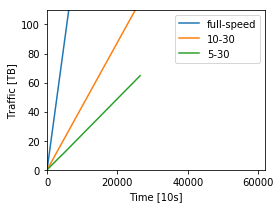

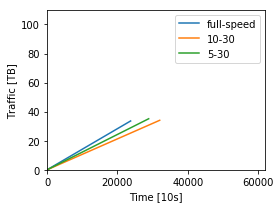

In [11]:

bw_values = dict()
retransmits = dict()

figure_to_csp = ['fig5', 'fig6']
filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/'))

def get_statistics(values, message):
	print("==============    " + message + "   ============")
	result = dict()
	result["avg"] = np.mean(values)
	result["std"] = np.std(values)
	result["npoints"] = len(values)
	result["99th"] = np.percentile(values, 99)
	result["75th"] = np.percentile(values, 75)
	result["50th"] = np.percentile(values, 50)
	result["25th"] = np.percentile(values, 25)
	result["1st"] = np.percentile(values, 1)
	result["CoV"] = result["std"] / result["avg"]
	result["min"] = np.min(values)
	result["max"] = np.max(values)
	print(result)
	print("================================")
	return result

def get_bw_per_machine(machine_file, bw_values, retr):
	crnt_file = open(machine_file)
	data = json.load(crnt_file)

	no_intervals = len(data["intervals"])
	bandwidth = 0
	for i in range(0, no_intervals):
		no_bytes = data["intervals"][i]["sum"]["bytes"]
		#bandwidth = (no_bytes * 8) / (10 * 1000 * 1000)
		if len(bw_values) > 0:
			bandwidth = no_bytes / (1024 * 1024 * 1024.0 * 1024) + bw_values[len(bw_values) - 1]
		else:
			bandwdith = no_bytes / (1024 * 1024 * 1024.0 * 1024)
		bw_values.append(bandwidth)
		retr.append(data["intervals"][i]["sum"]["retransmits"])

def check_change(values):
	for i in range(2, len(values) - 1):
		if abs(values[i] - values[i-1]) > 1.0 * values[i]:
			return i
	return len(values)

for crnt_fig in figure_to_csp:
	fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3))
	hindex = 0
	dirnames = ["full-speed", "10-30", "5-30"]
	stats = dict()

	for d in dirnames:
		bw_values[d] = []
		retransmits[d] = []
		dirname = join(inputdir, crnt_fig, d)
		machine_files = sorted([join(dirname, f) for f in listdir(dirname) if isfile(join(dirname, f)) and f.endswith(".json")])
		partnames = ["cmeans", "cmedians", "cmaxes", "cmins", "cbars"]

		for machine_file in machine_files:
			get_bw_per_machine(machine_file, bw_values[d], retransmits[d])

	ax.plot(np.arange(0, len(bw_values["full-speed"])), bw_values["full-speed"], color='#1f77b4', label = "full-speed")

	arr = []
	x = 0
	for i in range(0, len(bw_values["10-30"])):
		arr.append(x)
		x += 4
	ax.plot(arr, bw_values["10-30"], color='#ff7f0e', label = "10-30")

	arr = []
	x = 0
	for i in range(0, len(bw_values["5-30"])):
		arr.append(x)
		x += 3.5

	ax.plot(arr, bw_values["5-30"], color='#2ca02c', label = "5-30")
	ax.set_xticks(np.arange(0, 62000, 20000))
	ax.set_xlim(0, 62100)
	ax.set_xlabel("Time [10s]")
	ax.set_ylabel("Traffic [TB]")
	ax.set_ylim(0, 110)
	ax.legend()
	plt.tight_layout()

	plt.show()

	bw_values = dict()
	retransmits = dict()
